# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

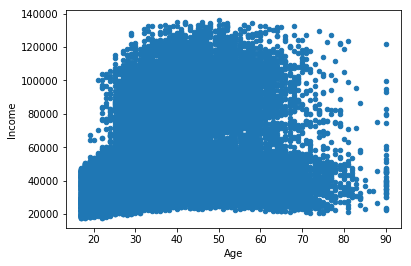

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

Los coeficientes estimados son 
 
 b0= [32538.08813087] 
 b1= [542.16765707]


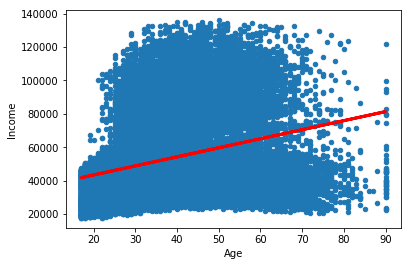

In [4]:
from  sklearn.linear_model  import LinearRegression
import matplotlib.pyplot as plt
lr_ing = LinearRegression()
lr_ing.fit(income['Age'].values.reshape(-1, 1), income['Income'].values.reshape(-1, 1))

print("Los coeficientes estimados son \n",
      "\n b0=",lr_ing.intercept_,
      "\n b1=",lr_ing.coef_[0])

income.plot(x='Age', y='Income', kind='scatter')
plt.plot(income['Age'], lr_ing.intercept_+lr_ing.coef_[0]*income['Age'], 
         color='red', linewidth=3)


###### Relacion Ingreso - Edad
Aunque no salta a la vista se tiene que a mayor edad mayor ingreso 

Por un aumento de uno en la edad en promedio aumenta 542.2 el ingreso

In [5]:
new_x = np.array([30, 40])
lr_ing.predict(new_x.reshape(-1, 1))

array([[48803.11784304],
       [54224.79441376]])

###### A una edad de 30 años se espera que el ingreso sea 48.803, y a  una edad de 40 la predicción  del ingreso es 54.225

# Exercise 2.2
Evaluate the model using the MSE

In [6]:
from sklearn import metrics
ingreso_est = lr_ing.predict(income['Age'].values.reshape(-1, 1))
MSE = metrics.mean_squared_error(income['Income'].values.reshape(-1, 1), ingreso_est)
print('MSE:  ',round(MSE,2))
print('RMSE: ',round(np.sqrt(MSE),2))

MSE:   593783043.84
RMSE:  24367.66



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [7]:
income['Age2']=income['Age']**2
n_obs = income.shape[0]
X=np.column_stack(([1]*n_obs,income[['Age','Age2']]))
Y=income['Income']

B=np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, Y))
print(B)

[-16225.07097408   3131.77014151    -30.54341041]


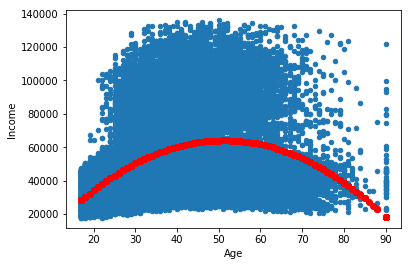

In [8]:
income.plot(x='Age', y='Income', kind='scatter')
plt.plot(income['Age'], B[0]+B[1]*income['Age']+B[2]*(income['Age']**2), 'bo',
         color='red')

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [9]:
income.dtypes

Age                 int64
Workclass          object
fnlwgt              int64
Education          object
Education-Num       int64
Martial Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours per week      int64
Country            object
Income            float64
Age2                int64
dtype: object

In [10]:
#Variables a categoricas
income["Workclass"] = income["Workclass"].astype("category")
income["Education"] = income["Education"].astype("category")
income["Martial Status"] = income["Martial Status"].astype("category")
income["Occupation"] = income["Occupation"].astype("category")
income["Relationship"] = income["Relationship"].astype("category")
income["Race"] = income["Race"].astype("category")
income["Sex"] = income["Sex"].astype("category")
income["Country"] = income["Country"].astype("category")

#Construccion de variables dummies
Workclass_df=pd.get_dummies(income['Workclass'],prefix='w',drop_first=True)
Education_df=pd.get_dummies(income['Education'],prefix='E',drop_first=True)
Martial_Status_df=pd.get_dummies(income['Martial Status'],prefix='M',drop_first=True)
Occupation_df=pd.get_dummies(income['Occupation'],prefix='O',drop_first=True)
Relationship_df=pd.get_dummies(income['Relationship'],prefix='R',drop_first=True)
Race_df=pd.get_dummies(income['Race'],prefix='RA',drop_first=True)
Sex_df=pd.get_dummies(income['Sex'],prefix='S',drop_first=True)
Country_df=pd.get_dummies(income['Country'],prefix='C',drop_first=True)

income=income.join(Workclass_df)
income=income.join(Education_df)
income=income.join(Martial_Status_df)
income=income.join(Occupation_df)
income=income.join(Relationship_df)
income=income.join(Race_df)
income=income.join(Sex_df)
income=income.join(Country_df)

#Variables de la regresion
X_num = income.loc[:, income.dtypes != 'category' ]
X_reg = X_num.loc[:, X_num.columns != 'Income']
X_reg.head()
X_reg.columns

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Age2', 'w_Local-gov', 'w_Never-worked', 'w_Private',
       'w_Self-emp-inc', 'w_Self-emp-not-inc', 'w_State-gov', 'w_Without-pay',
       'E_11th', 'E_12th', 'E_1st-4th', 'E_5th-6th', 'E_7th-8th', 'E_9th',
       'E_Assoc-acdm', 'E_Assoc-voc', 'E_Bachelors', 'E_Doctorate',
       'E_HS-grad', 'E_Masters', 'E_Preschool', 'E_Prof-school',
       'E_Some-college', 'M_Married-AF-spouse', 'M_Married-civ-spouse',
       'M_Married-spouse-absent', 'M_Never-married', 'M_Separated',
       'M_Widowed', 'O_Armed-Forces', 'O_Craft-repair', 'O_Exec-managerial',
       'O_Farming-fishing', 'O_Handlers-cleaners', 'O_Machine-op-inspct',
       'O_Other-service', 'O_Priv-house-serv', 'O_Prof-specialty',
       'O_Protective-serv', 'O_Sales', 'O_Tech-support', 'O_Transport-moving',
       'R_Not-in-family', 'R_Other-relative', 'R_Own-child', 'R_Unmarried',
       'R_Wife', 'RA_Asian-Pac-Islander', 'RA_Bl

In [11]:
lr_all = LinearRegression()
lr_all.fit(X_reg, income['Income'].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
ingreso_est2 = lr_all.predict(X_reg)
MSE2 = metrics.mean_squared_error(income['Income'].values.reshape(-1, 1), ingreso_est2)
print('MSE:  ',round(MSE2,2))
print('RMSE: ',round(np.sqrt(MSE2),2))

MSE:   287648796.93
RMSE:  16960.21


In [13]:
print("RMSE con solo edad:",round(np.sqrt(MSE),2))
print("RMSE muchas más variables:",round(np.sqrt(MSE2),2))

RMSE con solo edad: 24367.66
RMSE muchas más variables: 16960.21


###### El desempeño es mucho mejor usando mas variables

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [14]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [15]:
#No se tienen en cuenta las varibales relacionadas con el pais
income_sin_pais = income.loc[:, income.columns.str[:2]  != 'C_' ]
X_num = income_sin_pais.loc[:, income_sin_pais.dtypes != 'category' ]
X_log = X_num.loc[:, X_num.columns != 'isUS']
X_log.head()
X_log.columns

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Income', 'Age2', 'w_Local-gov', 'w_Never-worked',
       'w_Private', 'w_Self-emp-inc', 'w_Self-emp-not-inc', 'w_State-gov',
       'w_Without-pay', 'E_11th', 'E_12th', 'E_1st-4th', 'E_5th-6th',
       'E_7th-8th', 'E_9th', 'E_Assoc-acdm', 'E_Assoc-voc', 'E_Bachelors',
       'E_Doctorate', 'E_HS-grad', 'E_Masters', 'E_Preschool', 'E_Prof-school',
       'E_Some-college', 'M_Married-AF-spouse', 'M_Married-civ-spouse',
       'M_Married-spouse-absent', 'M_Never-married', 'M_Separated',
       'M_Widowed', 'O_Armed-Forces', 'O_Craft-repair', 'O_Exec-managerial',
       'O_Farming-fishing', 'O_Handlers-cleaners', 'O_Machine-op-inspct',
       'O_Other-service', 'O_Priv-house-serv', 'O_Prof-specialty',
       'O_Protective-serv', 'O_Sales', 'O_Tech-support', 'O_Transport-moving',
       'R_Not-in-family', 'R_Other-relative', 'R_Own-child', 'R_Unmarried',
       'R_Wife', 'RA_Asian-Pac-Islande

In [16]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
reg_log = logistic.fit(X_log, income['isUS'])
reg_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred_log = reg_log.predict(X_log)
acc = float((y_pred_log == income['isUS']).mean())
print('Accuracity: ', round(acc,5))

Accuracity:  0.89586
